#### CSE-221710313024-Kommera Shresta

## Project-Classify Real or Fake JobPosting

To predict the job posting is a real or fake posting using Machine Learning.

# Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Data Loading

In [2]:
#Loading the dataset
data = pd.read_csv("fake_job_postings.csv")
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


# Dimensions of data

In [3]:
#checking dimensions of data
print(data.shape)

(17880, 18)


In [4]:
#checking first n rows
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Statistical summary of Data

In [5]:
#summary of statistics
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#checking list of columns in dataset
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [7]:
#checking for unique values
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

### checking Null Values

In [8]:
#checking if any null values are present
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

### Droping Unnecessary Columns

In [9]:
#droping the unnecessary columns
data = data.drop(["job_id","salary_range"], axis=1)

In [10]:
#checking top n rows 
data.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


##### Mode Imputation

In [11]:
#filling Nan values with mode imputation for title 
data['title'].fillna(data['title'].mode()[0],inplace=True)

In [12]:
#filling Nan values with mode imputation for location 
data['location'].fillna(data['location'].mode()[0],inplace=True)

In [13]:
#filling Nan values with mode imputation for department
data['department'].fillna(data['department'].mode()[0],inplace=True)

In [14]:
#filling Nan values with mode imputation for company_profile
data['company_profile'].fillna(data['company_profile'].mode()[0],inplace=True)

In [15]:
#filling Nan values with mode imputation for description
data['description'].fillna(data['description'].mode()[0],inplace=True)

In [16]:
#filling Nan values with mode imputation for requirements
data['requirements'].fillna(data['requirements'].mode()[0],inplace=True)

In [17]:
#filling Nan values with mode imputation for benefits
data['benefits'].fillna(data['benefits'].mode()[0],inplace=True)

In [18]:
#filling Nan values with mode imputation foor telecommuting
data['telecommuting'].fillna(data['telecommuting'].mode()[0],inplace=True)

In [19]:
#filling Nan values with mode imputation for has_company_logo
data['has_company_logo'].fillna(data['has_company_logo'].mode()[0],inplace=True)

In [20]:
#filling Nan values with mode imputation has_questions
data['has_questions'].fillna(data['has_questions'].mode()[0],inplace=True)

In [21]:
#filling Nan values with mode imputation for employment_type
data['employment_type'].fillna(data['employment_type'].mode()[0],inplace=True)

In [22]:
#filling Nan values with mode imputation for required_experience
data['required_experience'].fillna(data['required_experience'].mode()[0],inplace=True)

In [23]:
#filling Nan values with mode imputation for required_education
data['required_education'].fillna(data['required_education'].mode()[0],inplace=True)

In [24]:
#filling Nan values with mode imputation for industry
data['industry'].fillna(data['industry'].mode()[0],inplace=True)

In [25]:
#filling Nan values with mode imputation for function
data['function'].fillna(data['function'].mode()[0],inplace=True)

In [26]:
#filling Nan values with mode imputation for fraudulent
data['fraudulent'].fillna(data['fraudulent'].mode()[0],inplace=True)

In [27]:
#checking first/top n rows
data.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Sales,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Exploratory Data Analysis
## Data visualization

0    17014
1      866
Name: fraudulent, dtype: int64

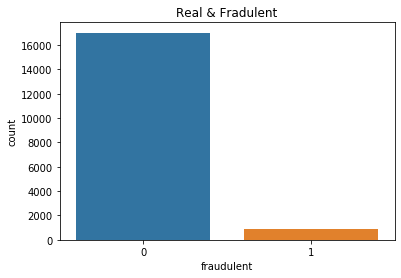

In [28]:
#checking the total number of fraudulent postings and real postings
import seaborn as sns
sns.countplot(data.fraudulent).set_title('Real & Fradulent')
data['fraudulent'].value_counts()

we will check the total number of fraudulent postings and real postings

Text(0, 0.5, 'required_education')

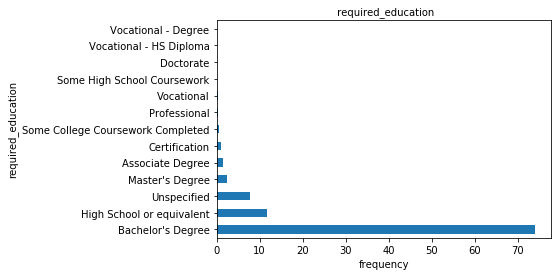

In [29]:
#We are using some plots to visualize the data and perform operations
#Visualize the required education in the jobs
#we are plotting  required_education on y axis vs frequency on x axis
(data.required_education.value_counts(normalize = True)*100).plot.barh()
plt.title(' required_education', size=10)
plt.xlabel('frequency', size=10)
plt.ylabel('required_education', size=10)

In this plot, we will visualize the number of job postings by required education.And we can observe Bachelor Degree have high frequency compared to other types.

Text(0, 0.5, 'employment_type')

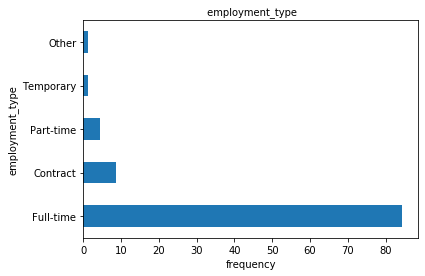

In [30]:
#Visualize the employment type in the jobs
#we are plotting employment_type on y axis vs frequency on x axis
(data.employment_type.value_counts(normalize = True)*100).plot.barh()
plt.title(' employment_type', size=10)
plt.xlabel('frequency', size=10)
plt.ylabel('employment_type', size=10)

In this plot, we will visualize the number of job postings by employment type. And we can observe Full time have high frequency compared to other types

Text(0, 0.5, 'required_experience')

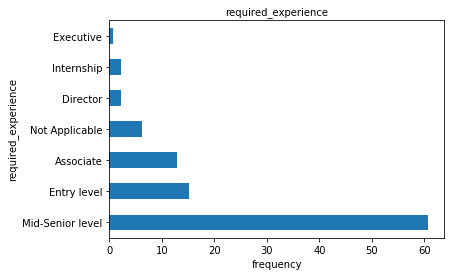

In [31]:
#Visualize the required experiences in the jobs
#we are plotting frequency of required_experience on y axis vs frequency on x axis
(data.required_experience.value_counts(normalize = True)*100).plot.barh()
plt.title('required_experience', size=10)
plt.xlabel('frequency', size=10)
plt.ylabel('required_experience', size=10)

In this plot, we will visualize the number of job postings by required experience. And we can observe Mid-Senior level have high frequency compared to other types.

Text(0, 0.5, 'function')

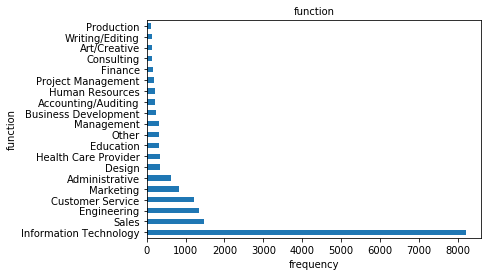

In [32]:
#Visualize the functions in the jobs
#we are plotting  function on y axis vs frequency on x axis
data['function'].value_counts()[:20].plot(kind='barh')
plt.title('function', size=10)
plt.xlabel('frequency', size=10)
plt.ylabel('function', size=10)

In this plot, we will visualize the number of job postings by function. And we can observe Information Technology have high frequency compared to other types.

Text(0, 0.5, 'industry')

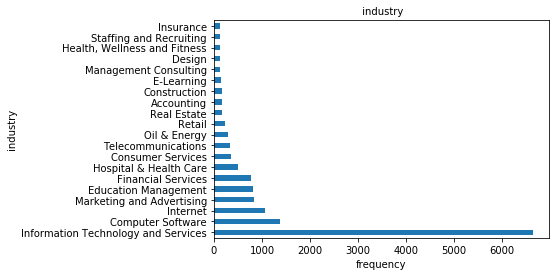

In [33]:
#Visualize the industries in the jobs
#we are plotting  industry on y axis vs frequency on x axis
data['industry'].value_counts()[:20].plot(kind='barh')
plt.title(' industry', size=10)
plt.xlabel('frequency', size=10)
plt.ylabel('industry', size=10)

In this plot, we will visualize the number of job postings by Industry. And we can observe Information Technology have high frequency compared to other types.

Text(0, 0.5, 'location')

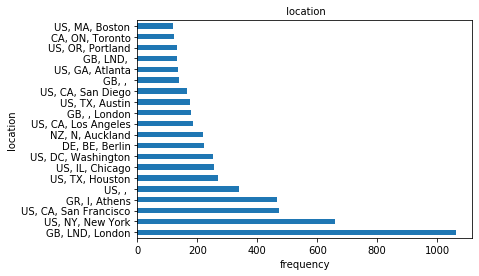

In [34]:
#Visualize the industries in the jobs
#we are plotting frequency of industry on y axis vs frequency on x axis
data['location'].value_counts()[:20].plot(kind='barh')
plt.title(' location', size=10)
plt.xlabel('frequency', size=10)
plt.ylabel('location', size=10)

In this plot, we will visualize the number of job postings by location. And we can observe GB,LND,London have high frequency compared to other locations.

0    9088
1    8792
Name: has_questions, dtype: int64

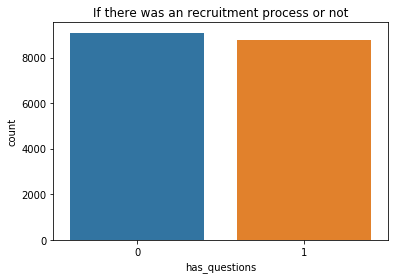

In [35]:
#Visualizing If there was an recruitment process or not by plotting
sns.countplot(data.has_questions).set_title('If there was an recruitment process or not')
data['has_questions'].value_counts()

In this plot, we will visualize the number of job postings have any recruitment process or not. And we can observe have high frequency for having.

0    17113
1      767
Name: telecommuting, dtype: int64

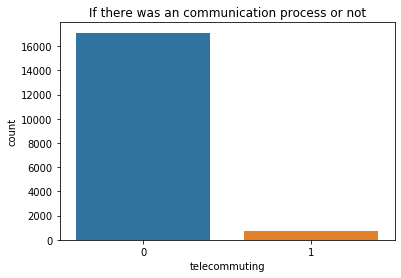

In [36]:
#Visualizing If there was an communication process or not by plotting
sns.countplot(data.telecommuting).set_title('If there was an communication process or not')
data['telecommuting'].value_counts()

In this plot, we will visualize the number of job postings have any telecommuting or not. And we can observe have high frequency for having.

1    14220
0     3660
Name: has_company_logo, dtype: int64

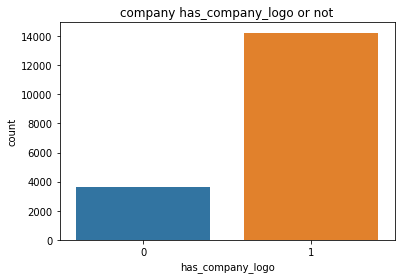

In [37]:
#Visualizing  company has_company_logo or not by plotting
sns.countplot(data.has_company_logo).set_title('company has_company_logo or not')
data['has_company_logo'].value_counts()

In this plot, we will visualize the number of job postings have any have a company logo or not. And we can observe have less frequency for having.

##### Correlation

In [38]:
#correlation matrix plot for dataset
corelation = data.corr()

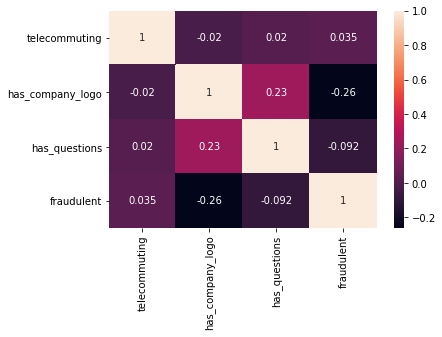

In [39]:
# Visualizing through heatmap
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

# Train_test_split

In [40]:
#checking each attributes data type
data.dtypes

title                  object
location               object
department             object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [41]:
#combine text in a single column
data['function'] = data['title'] + data['location']  + data['department']  + data['company_profile'] + data['description']  + data['requirements']  + data['benefits'] + data['employment_type']+ data['required_experience']  + + data['required_education']  + data['industry']  + data['function'] 

In [42]:
#separating input and output data
X = data.function
y=data.fraudulent

In [43]:
## input and output into training data and testing data
#Training--> we will be training the model on training data
#Testing--> check the performance of the model

In [44]:
# split the data column indices
# build the model on training data and check the model performance on test data
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=2)

In [45]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(12516,)
(5364,)
(12516,)
(5364,)


### TFIDF Vectorizer

In [46]:
# Importing TfIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize and object for the TFIDF Vectorizer
tfidf = TfidfVectorizer()

In [47]:
# applying the tfidf to the data(train_X)
train_X_tf = tfidf.fit_transform(train_X)
train_X_tf

<12516x99945 sparse matrix of type '<class 'numpy.float64'>'
	with 2774532 stored elements in Compressed Sparse Row format>

In [48]:
# applying the tfidf to the data(test_X)
test_X_tf = tfidf.transform(test_X)
test_X_tf

<5364x99945 sparse matrix of type '<class 'numpy.float64'>'
	with 1166887 stored elements in Compressed Sparse Row format>

In [49]:
# Feature Names
tfidf.get_feature_names()

['00',
 '000',
 '0000',
 '0001pt',
 '0005',
 '000a',
 '000aed',
 '000applying',
 '000benefits',
 '000bonus',
 '000cash',
 '000commission',
 '000company',
 '000equity',
 '000full',
 '000gbp',
 '000generate',
 '000health',
 '000highly',
 '000hours',
 '000how',
 '000if',
 '000incentivised',
 '000kuniversity',
 '000location',
 '000medical',
 '000overview',
 '000position',
 '000responsibilitiesyou',
 '000retailer',
 '000rn',
 '000see',
 '000skill',
 '000term',
 '000type',
 '000uncapped',
 '000university',
 '000victor',
 '000we',
 '000working',
 '001',
 '001ba',
 '003',
 '005',
 '00592duration',
 '006',
 '0062834see',
 '0062953full',
 '008',
 '00a',
 '00am',
 '00benefits',
 '00commission',
 '00pay',
 '00pdental',
 '00please',
 '00pm',
 '00pmcomfortable',
 '00pmeducation',
 '00pmfriday',
 '00pmjoin',
 '00pmmust',
 '00pmoverall',
 '00pmsaturday',
 '00pmstarting',
 '00pmtechnical',
 '00pmthursday',
 '00pmwednesday',
 '00pmwhere',
 '00pmyour',
 '00ppay',
 '00salary',
 '00saturdays',
 '00start',


In [50]:
# position of the words in the sparse matrix
tfidf.vocabulary_

{'caregiver': 13794,
 'hha': 39619,
 'cna': 16480,
 'watervliet': 94657,
 'hartfordus': 39050,
 'mi': 53256,
 'watervlietsales': 94658,
 'our': 59697,
 'mission': 53769,
 'to': 88324,
 'clients': 16021,
 'is': 44514,
 'preserve': 65814,
 'their': 87291,
 'independence': 42018,
 'enhance': 29915,
 'quality': 69318,
 'of': 57401,
 'life': 48334,
 'promote': 68187,
 'health': 39281,
 'amp': 4841,
 'wellbeing': 95182,
 'and': 5209,
 'have': 39105,
 'them': 87300,
 'consider': 18765,
 'us': 92567,
 'part': 60704,
 'family': 33829,
 'home': 40026,
 'sweet': 84341,
 'in': 41765,
 'care': 13735,
 'one': 58016,
 'the': 87260,
 'fastest': 33957,
 'growing': 38269,
 'agencies': 3995,
 'southwest': 80738,
 'michigan': 53282,
 'constant': 18860,
 'growth': 38296,
 'attributed': 8416,
 'excellent': 32125,
 'client': 15971,
 'employee': 29077,
 'service': 77394,
 'join': 45507,
 'team': 85570,
 'you': 97128,
 'will': 95512,
 'be': 10014,
 'treated': 89548,
 'as': 7262,
 'valued': 93147,
 'not': 56716

In [51]:
# Idf of the terms
tfidf.idf_

array([4.67910079, 3.45383726, 9.74169582, ..., 9.74169582, 9.04854864,
       9.74169582])

# Logistic Regression

In [52]:
# build the classifier on training data
#sklearn library : import,instantiate,fit

In [53]:
## Import Logistic Regression
from sklearn.linear_model import LogisticRegression
# creating an object for Logistic Regression
lg=LogisticRegression()

In [54]:
# input and output will be passes to the fit method
lg.fit(train_X_tf, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# predicting on train data
#syntax :objectName:predict(input)
train_y_pred = lg.predict(train_X_tf)
train_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
# compare the actual values(train_y) with predicted values(train_y_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(train_y,train_y_pred)

array([[11905,     0],
       [  356,   255]], dtype=int64)

In [57]:
#printing classification report
print(classification_report(train_y,train_y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     11905
           1       1.00      0.42      0.59       611

    accuracy                           0.97     12516
   macro avg       0.99      0.71      0.79     12516
weighted avg       0.97      0.97      0.97     12516



In [58]:
#accuracy score for logistic regression using(trainy_,train_y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(train_y,train_y_pred)

0.9715564077980186

In [59]:
# input and output will be passes to the fit method
lg.fit(test_X_tf, test_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
# predicting on test data
#syntax :objectName:predict(output)
test_y_pred = lg.predict(test_X_tf)
test_y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(test_y,test_y_pred)

array([[5109,    0],
       [ 190,   65]], dtype=int64)

In [62]:
#printing classification report
print(classification_report(test_y,test_y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5109
           1       1.00      0.25      0.41       255

    accuracy                           0.96      5364
   macro avg       0.98      0.63      0.69      5364
weighted avg       0.97      0.96      0.95      5364



In [63]:
#accuracy score for logistic regression using(y_test,y_test_pred)
from sklearn.metrics import accuracy_score
accuracy_score(test_y,test_y_pred)

0.9645786726323639

In [64]:
#accuracy score for logistic regression
lg_score = (accuracy_score(test_y,test_y_pred))*100
lg_score

96.45786726323638

In [65]:
#precision rate
from sklearn.metrics import precision_score
precision_score(test_y, test_y_pred)

1.0

# Naive Bayes 

In [66]:
# Apply the naive Bayes Algorithm
# Import BernNB
from sklearn.naive_bayes import BernoulliNB
# creating an object for BerNB
model_BernNB = BernoulliNB()

In [67]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(train_X_tf, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [68]:
# predicting on train data
#syntax :objectName:predict(input)
train_y_pred = model_BernNB.predict(train_X_tf)

In [69]:
# compare the actual values(train_y) with predicted values(train_y_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(train_y,train_y_pred)

array([[11854,    51],
       [  503,   108]], dtype=int64)

In [70]:
#classification report
print(classification_report(train_y,train_y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11905
           1       0.68      0.18      0.28       611

    accuracy                           0.96     12516
   macro avg       0.82      0.59      0.63     12516
weighted avg       0.95      0.96      0.94     12516



In [71]:
#accuracy score for Naive Bayes using (train_y,train_y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(train_y,train_y_pred)

0.955736657078939

In [72]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(test_X_tf, test_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [73]:
# predicting on test data
#syntax :objectName:predict(output)
test_y_pred = model_BernNB.predict(test_X_tf)

In [74]:
# compare the actual values(test_y) with predicted values(test_y_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(test_y,test_y_pred)

array([[5108,    1],
       [ 253,    2]], dtype=int64)

In [75]:
#printing classification report
print(classification_report(test_y,test_y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5109
           1       0.67      0.01      0.02       255

    accuracy                           0.95      5364
   macro avg       0.81      0.50      0.50      5364
weighted avg       0.94      0.95      0.93      5364



In [76]:
#accuracy score for Naive Bayes using (y_test,y_test_pred)
from sklearn.metrics import accuracy_score
accuracy_score(test_y,test_y_pred)

0.9526472781506339

In [77]:
#accuracy score for Naive Bayes
naive_score = (accuracy_score(test_y,test_y_pred))*100
naive_score

95.2647278150634

### Comparsion plot for Logistic Regression and Naive Bayes

Text(0, 0.5, 'Accuracy')

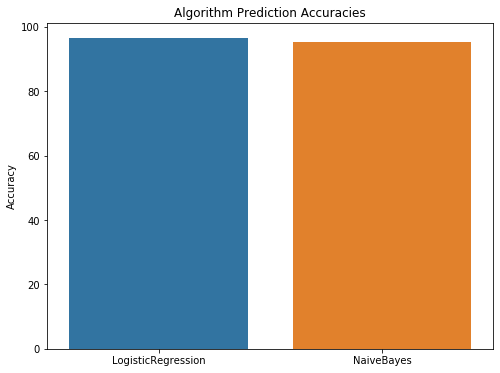

In [78]:
#comparing accuracy scores of Logistic Regression and Naive Bayes 
Methods = ['LogisticRegression', 'NaiveBayes']
Scores = np.array([lg_score,naive_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

In above plot, we plotted accuracy scores of Logistic Regression and Naive Bayes.From these plot we can say that accuracy score of Logistic Regression is higher than Naive Bayes.So from this observation we can say that logistic regression is most preferable.

## GridSearchCV

In [79]:
#Import the GridSearchCV 
#Passing list of values  in a dictionary to find the optimum value for each parameter
from sklearn.model_selection import GridSearchCV
dual=[False]
max_iter=[100]
param_grid = dict(dual=dual,max_iter=max_iter)

In [80]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
lg = LogisticRegression(dual=False)
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv = 3, n_jobs=-1)

# applying gridsearch onto dataset
grid_search.fit(train_X_tf, train_y)
grid_result = grid_search.fit(train_X_tf, train_y)

In [81]:
#checking for best parameters
grid_result.best_params_

{'dual': False, 'max_iter': 100}

In [82]:
lg = LogisticRegression(dual = False, max_iter = 100)

# We need to fit the model to the data
lg.fit(train_X_tf, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# Prediction on test data
pred_test = lg.predict(test_X_tf)

#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5109
           1       0.99      0.40      0.57       255

    accuracy                           0.97      5364
   macro avg       0.98      0.70      0.78      5364
weighted avg       0.97      0.97      0.97      5364



In [84]:
#accuracy score for after Hyper Parameter Tuning
lg_score = (lg.score(test_X_tf, pred_test))*100
lg_score

100.0

### Comparsion plot for Logistic Regression and Naive Bayes After Hyper Parameter Tuning (and GridsearchCV)

Text(0, 0.5, 'Accuracy')

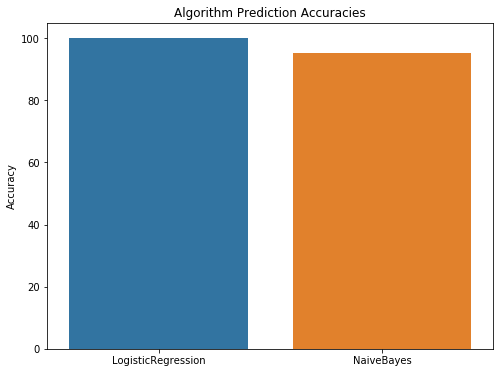

In [85]:
#comparing accuracy scores of Logistic Regression and Naive Bayes
Methods = ['LogisticRegression', 'NaiveBayes']
Scores = np.array([lg_score,naive_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

In above plot, we plotted accuracy scores of Logistic Regression and Naive Bayes after hyper parameter tuning (and GridsearchCV)for best model.From these plot we can say that accuracy score of Logistic Regression is higher than Naive Bayes.So from this observation we can say that logistic regression is most preferable.